In [2]:
import testing as tst
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pickle import load, dump 
#import seaborn as sns
import math
import datetime
import calplot

# Choosing the best and the worst network

In [231]:
hpt=pd.read_csv('Hyperparameter tuning - Hoja 1_2.csv')
hpt.tiempo_train=pd.to_timedelta(hpt.tiempo_train)
hpt=hpt.set_index(hpt.mae_de_dia_promedio)
hpt=hpt.sort_index()
# hpt.astype(int)
hpt.mae_de_dia_promedio=hpt.mae_de_dia_promedio.astype(float)
# fig, ax=plt.subplots(figsize=(10,15))
# ax.plot(hpt.dif_energia_wh,'b.')
hpt

,In_size,Lr,BS,training_MAE,val_MAE,dif_energia_wh,porcentaje_energia,porcentaje_mae,mae_de_dia_promedio,epocas corridas,model_name,out document,tiempo_train,Tested,Unnamed: 14
mae_de_dia_promedio,,,,,,,,,,,,,,,
89.410439,288,"1,00E-06",64,"0,006","0,0053",-208.9545129700591,-3.380076,18.744257,89.410439,109,out_s_144_lr_1e-06_in_s_288Global_azimuthaltur...,33_in_288_BS_64_lr1e-6.out,2 days 21:32:10.859024,1,jupyterhub
89.463804,288,"1,00E-06",128,"0,0061","0,0055",-155.1854860157409,-2.510301,18.776569,89.463804,140,out_s_144_lr_1e-06_in_s_288Global_azimuthaltur...,34_in_288_BS_128_lr1e-6.out,2 days 17:06:55.320235,1,jupyterhub
90.110000,576,"1,00E-06",32,"0,0061","0,0055",-155.65,-2.520000,18.890000,90.110000,74,out_s_144_lr_1e-06_in_s_576Global_azimuthaltur...,13_in_576_BS_32_lr1e-6.out,5 days 22:39:49.755907,1,jupyterhub
90.400000,576,"1,00E-06",256,"0,0072","0,0055",-141.12,-2.280000,18.900000,90.400000,"140,000",out_s_144_lr_1e-06_in_s_576Global_azimuthaltur...,31_in_576_BS_256_lr1e-6.out,4 days 10:55:13.879436,1,jupyterhub
90.660000,144,"1,00E-06",64,"0,0063","0,0055",-127.37,-2.060000,19.200000,90.660000,100,out_s_144_lr_1e-06_in_s_144Global_azimuthaltur...,28_in_144_BS_64_lr1e-6.out,1 days 06:12:23.245594,1,jupyterhub
90.940000,144,"1,00E-06",128,"0,0064","0,0056",-184.41,-2.980000,19.110000,90.940000,138,out_s_144_lr_1e-06_in_s_144Global_azimuthaltur...,29_in_144_BS_128_lr1e-6.out,1 days 05:56:22.660099,1,jupyterhub
91.286418,288,"1,00E-06",256,"0,007","0,0057",-179.60005150794404,-2.905235,19.092651,91.286418,140,out_s_144_lr_1e-06_in_s_288Global_azimuthaltur...,35_in_288_BS_256_lr1e-6.out,2 days 00:47:55.080217,1,jupyterhub
91.301014,288,"1,00E-06",32,"0,0058","0,0056",-273.7427779915024,-4.428100,18.935309,91.301014,93,out_s_144_lr_1e-06_in_s_288Global_azimuthaltur...,32_in_288_BS_31_lr1e-6.out,3 days 20:29:41.296569,1,jupyterhub
91.460000,144,"1,00E-06",256,"0,0072","0,0056",-98.54,-1.590000,19.300000,91.460000,140,out_s_144_lr_1e-06_in_s_144Global_azimuthaltur...,30_in_144_BS_256_lr1e-6.out,0 days 22:21:45.267439,1,jupyterhub


In [233]:
hpt.tiempo_train=hpt['tiempo_train'].astype('timedelta64[s]').div(3600)
hpt.mae_de_dia_promedio

mae_de_dia_promedio
89.410439      89.410439
89.463804      89.463804
90.110000      90.110000
90.400000      90.400000
90.660000      90.660000
90.940000      90.940000
91.286418      91.286418
91.301014      91.301014
91.460000      91.460000
91.480000      91.480000
94.387992      94.387992
95.440000      95.440000
95.750000      95.750000
96.220000      96.220000
96.830000      96.830000
97.190000      97.190000
97.507210      97.507210
97.800000      97.800000
97.816279      97.816279
97.870000      97.870000
98.660000      98.660000
98.780488      98.780488
99.170000      99.170000
99.800000      99.800000
101.568100    101.568100
102.130000    102.130000
103.820000    103.820000
103.900000    103.900000
103.990000    103.990000
105.471031    105.471031
105.800000    105.800000
106.700000    106.700000
109.724169    109.724169
110.990000    110.990000
112.280905    112.280905
114.140000    114.140000
302.810000    302.810000
315.920000    315.920000
323.710408    323.710408
324.5

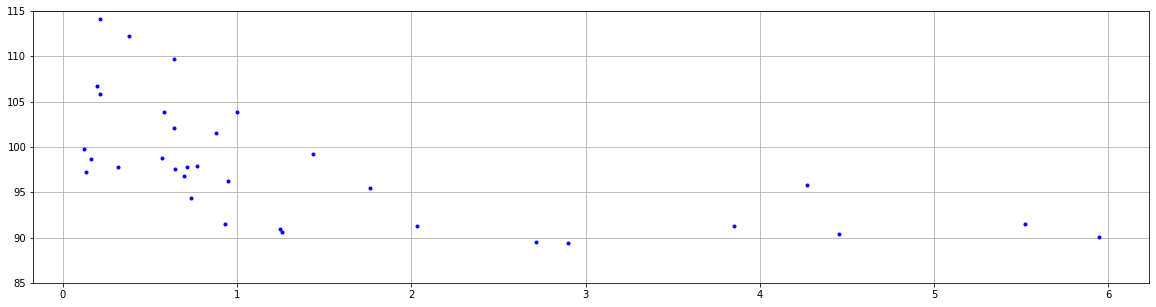

In [239]:
fig, ax=plt.subplots(figsize=(20,5))
ax.plot(hpt.tiempo_train/24,hpt.mae_de_dia_promedio,'b.')
ax.set_ylim(85,115)
ax.grid()

In [94]:
hpt.index[16]+hpt.index[29]

Timedelta('1 days 15:17:54.237664')

## Worst network

val_data_archivo='../../01_weather_data/02_cleaned_data/ESORU_noche_angulossolares_2.csv'
model_path='../02_grid_training/01_models/'
metric_model='train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1e-07_Global_BS24.h5'
input_size=6
yearly_w,daily_w,hourly_w=tst.metricsamples(model_path,metric_model,input_size,val_data_archivo)
yearly_w.to_csv('yearly_w.csv')
daily_w.to_csv('daily_w.csv')
hourly_w.to_csv('hourly_w.csv')

In [21]:
yearly_w,daily_w,hourly_w=tst.dfmetricas(pd.read_csv('13.csv',index_col=0,parse_dates=True),validation,'train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1e-07_Global_BS24.h5')

In [23]:
yearly

,Direct,Global,Difusa,Temperatura,Humedad,Presion,alturasolar,azimuth,prediccion,minutodia,...,mae_daily,E_d,Ep_d,DeltaE_d,Delta_E_abs_d,porcentaje_absoluto_energia_daily,E_dmape,E_dmae,mae_de_día_promedio,model
tiempo,,,,,,,,,,,,,,,,,,,,,
2019-12-31,233.00458,257.889782,69.498388,23.801579,55.550039,876.150209,-0.000049,0.152425,240.304258,715,...,47.83045,6186.887394,5767.302188,-421.159857,1147.544979,19.681764,11.691656,679.531549,95.002214,train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_1...


Text(0.5, 1.0, 'Worst_architecture daily mae')

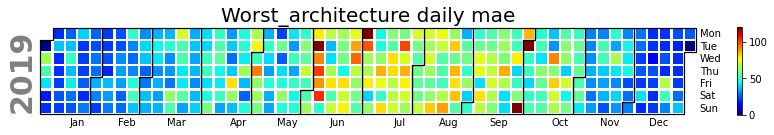

In [46]:
calplot.calplot(daily_w['mae'],cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1.2)
plt.title('Worst_architecture daily mae',fontsize=20) #vmax=230
pl

### Worst_day worst network

In [44]:
daily_w.mae.idxmax()

Timestamp('2019-06-04 00:00:00', freq='D')

mae_del_dia: 161.90606988684328


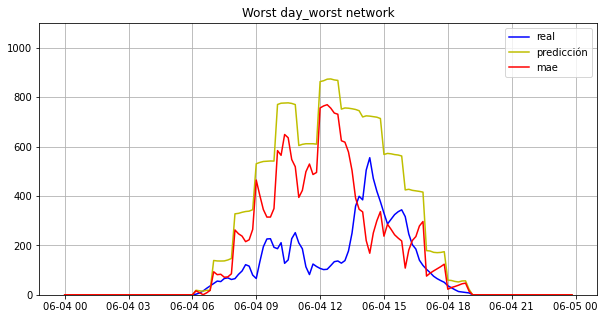

In [45]:
fecha='2019-06-04'
Title='Worst day_worst network'
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(hourly_w.Global[fecha],'b-',label='real')
ax.plot(hourly_w.prediccion[fecha],'y-',label='predicción')
ax.plot(hourly_w.mae[fecha],'r-',label='mae')
ax.legend()
ax.grid()
ax.set_ylim(0,1100)
plt.title(Title)
print('mae_del_dia:',daily_w.mae.loc[fecha])

### The best day (Probably)

mae_del_dia: 14.855480361514623


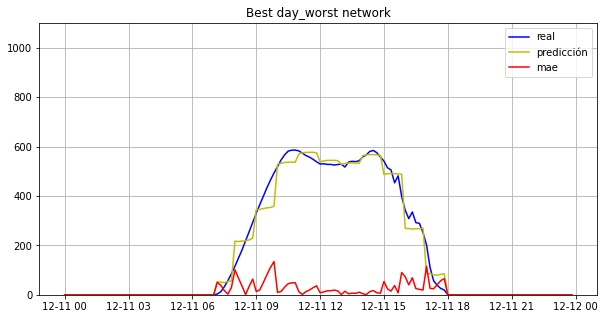

In [129]:
# fecha='2019-12-27'
fecha='2019-12-11'
Title='Best day_worst network'
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(hourly_w.Global[fecha],'b-',label='real')
ax.plot(hourly_w.prediccion[fecha],'y-',label='predicción')
ax.plot(hourly_w.mae[fecha],'r-',label='mae')

ax.legend()
ax.grid()
ax.set_ylim(0,1100)
plt.title(Title)
print('mae_del_dia:',daily_w.mae.loc[fecha])

# Best architecture

In [13]:
val_data_archivo='../../01_weather_data/02_cleaned_data/ESORU_noche_angulossolares_2.csv'
# '../../01_Documentos/02_preprocessed/ESORU_noche_angulossolares_2.csv'
# train_data=tst.importa('../../01_Documentos/02_preprocessed/TMY_noche_angulossolares.csv',nombres1)
model_path='../02_grid_training/01_models/'
metric_model='train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0.0001_Global_BS24.h5'
# metric_model='out_s_144_lr_1e-06_in_s_576Global_azimuthaltura_BS32.h5'
# input_size=576
input_size=6
yearly_b2,daily_b2,hourly_b2=tst.metricsamples(model_path,metric_model,input_size,val_data_archivo)
yearly_b2.to_csv('yearly_b2.csv')
daily_b2.to_csv('daily_b2.csv')
hourly_b2.to_csv('hourly_b2.csv')

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
val_data_archivo='../../01_weather_data/02_cleaned_data/esoru_night_angles_2.csv'
validation=pd.read_csv(val_data_archivo,index_col=0,parse_dates=True)
yearly,daily,hourly=tst.dfmetricas(pd.read_csv('93.csv',index_col=0,parse_dates=True),validation,'train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0.0001_Global_BS24.h5')
tablita=['model','Delta_E_abs_d','porcentaje_absoluto_energia_daily','mae_de_día_promedio']
yearly[tablita]

,model,Delta_E_abs_d,porcentaje_absoluto_energia_daily,mae_de_día_promedio
tiempo,,,,
2019-12-31,train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0...,979.212868,17.359247,81.170389


Text(0.5, 1.0, 'Best_architecture daily mae')

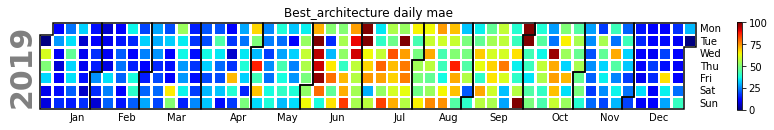

In [6]:
calplot.calplot(daily['mae'],cmap='jet',how='mean',vmin=0,vmax=100,edgecolor='black',linewidth=1.5)
plt.title('Best_architecture daily mae')

Text(0.5, 1.0, 'Best_architecture daily mae_2')

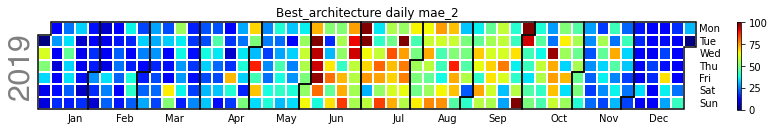

In [39]:
calplot.calplot(daily_b2['mae'],cmap='jet',how='mean',vmin=0,vmax=100,edgecolor='black',linewidth=1.5)
plt.title('Best_architecture daily mae_2')

### Worst day best network

mae_del_dia: 164.87921879567037


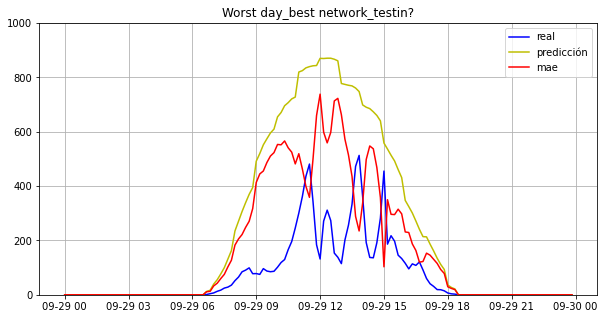

In [14]:
fecha='2019-09-29'
Title='Worst day_best network_testin?'
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(hourly.Global[fecha],'b-',label='real')
ax.plot(hourly.prediccion[fecha],'y-',label='predicción')
ax.plot(hourly.mae[fecha],'r-',label='mae')
ax.grid()
ax.legend()
ax.set_ylim(0,1000)
plt.title(Title)
print('mae_del_dia:',daily.mae.loc[fecha])

mae_del_dia: 167.09775946474076


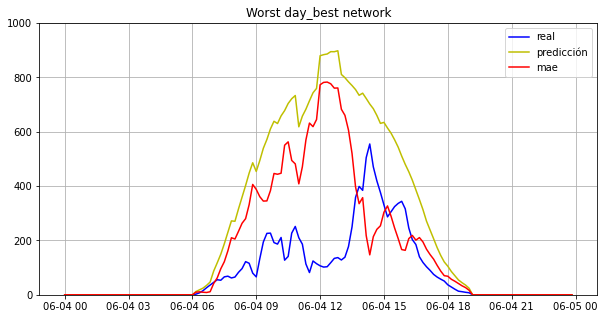

In [85]:
fecha='2019-06-04'
Title='Worst day_best network'
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(hourly_b2.Global[fecha],'b-',label='real')
ax.plot(hourly_b2.prediccion[fecha],'y-',label='predicción')
ax.plot(hourly_b2.mae[fecha],'r-',label='mae')
ax.grid()
ax.legend()
ax.set_ylim(0,1000)
plt.title(Title)
print('mae_del_dia:',daily_b2.mae.loc[fecha])

### Best day best network

mae_del_dia: 6.295044624646504


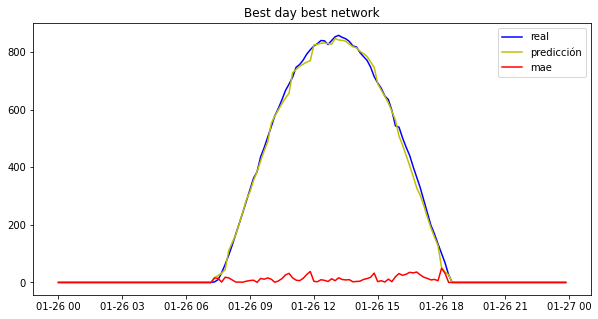

In [82]:
# fecha='2019-12-28'
fecha='2019-01-26'
Title='Best day best network'
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(hourly_b2.Global[fecha],'b-',label='real')
ax.plot(hourly_b2.prediccion[fecha],'y-',label='predicción')
ax.plot(hourly_b2.mae[fecha],'r-',label='mae')

ax.legend()
plt.title(Title)
print('mae_del_dia:',daily_b2.mae.loc[fecha])

In [88]:
daily_w.mae.max()

161.90606988684337

In [41]:
daily_b2.mae.idxmax()

Timestamp('2019-06-04 00:00:00', freq='D')

In [43]:
daily_b2.mae.idxmin()

Timestamp('2019-01-01 00:00:00', freq='D')

Text(0.5, 1.0, 'Daily total radiation energy [wh/m2]')

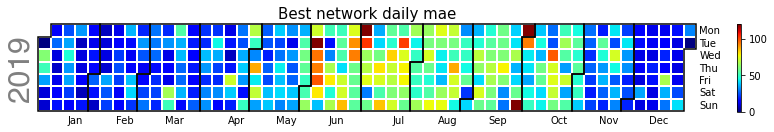

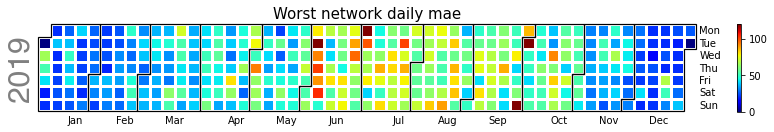

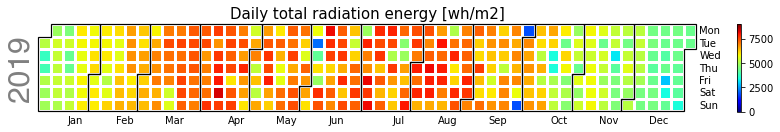

In [130]:
calplot.calplot(daily_b2['mae'],cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1.5)
plt.title('Best network daily mae',fontsize=15)
calplot.calplot(daily_w['mae'],cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1.2)
plt.title('Worst network daily mae',fontsize=15)
calplot.calplot(daily_w['energia_wh/m2'],cmap='jet',how='mean',vmin=0,vmax=1000*9,edgecolor='black',linewidth=1.2)
plt.title('Daily total radiation energy [wh/m2]',fontsize=15)

In [14]:
yearly_b

,model,dif_energia_wh,porcentaje_energia,porcentaje_mae,mae_de_día_promedio
tiempo,,,,,
2019-12-31,out_s_144_lr_1e-06_in_s_576Global_azimuthaltur...,-160.591709,-2.595679,19.343823,90.618626


In [15]:
yearly_w

,model,dif_energia_wh,porcentaje_energia,porcentaje_mae,mae_de_día_promedio
tiempo,,,,,
2019-12-31,out_s_144_lr_0.01_in_s_144Global_azimuthaltura...,-3272.510242,-52.894291,67.271598,343.803718


diferencia absoluta [w/m2] promedio anual por hora: 49.40785704593434


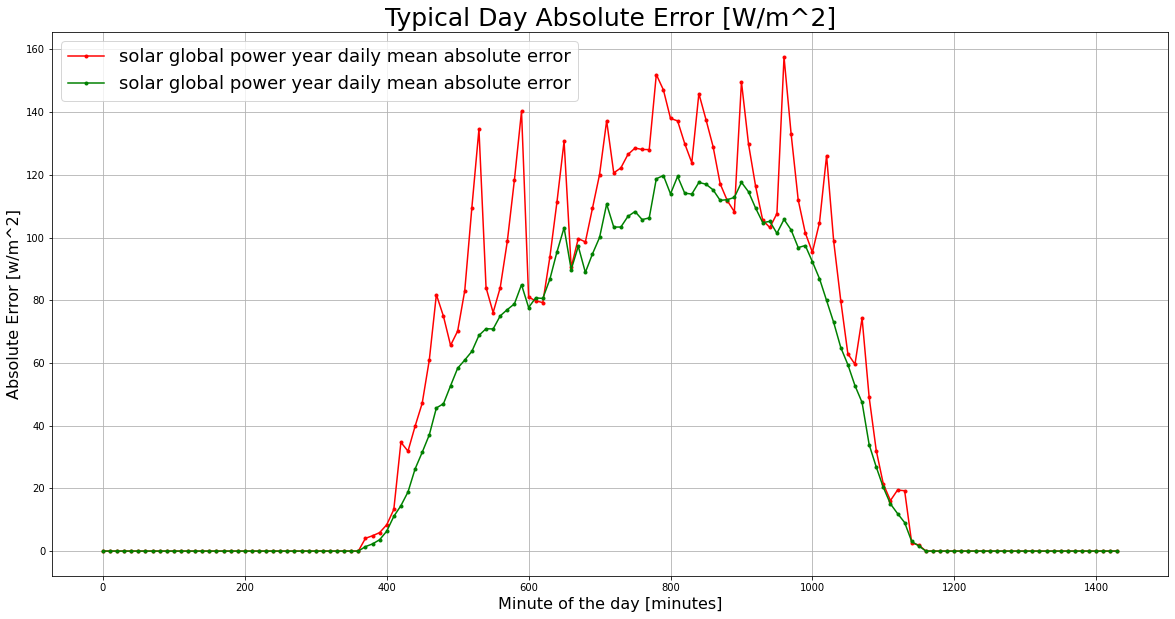

In [95]:
dfrad=hourly_w
dfrad2=hourly_b2
def typical_error_day(dfrad):
    dfmingroup=dfrad.groupby(['minutodia',pd.Grouper(freq='1H')]).mean()
    dfmindia=dfmingroup.groupby(pd.Grouper(level='minutodia',axis=0)).mean()
    meanaltura=dfmindia.alturasolar.mean()
    meandiay=dfmindia.mae.mean()
    return(dfmindia.mae)
# dfmindia.loc[dfmindia.alturasolar<0,'mae']=np.nan
worst=typical_error_day(dfrad)
best=typical_error_day(dfrad2)
fig, ax= plt.subplots(figsize=(20,10))
meandiay=dfmindia.mae.mean()
ax.plot(worst,'r.-',label='solar global power year daily mean absolute error')
ax.plot(best,'g.-',label='solar global power year daily mean absolute error')


plt.title('Typical Day Absolute Error [W/m^2]',fontsize=25)
ax.legend(fontsize=18)
ax.set_ylabel('Absolute Error [w/m^2]',fontsize=16)
ax.set_xlabel('Minute of the day [minutes]',fontsize=16)
plt.grid()
print('diferencia absoluta [w/m2] promedio anual por hora:',meandiay) 
#Poner un error porcentual en cada medición de todo el día de todo el año
#Quitar ceros en la noche 

In [ ]:
'../../../weather_data_imputation_for_Eplus_simulations/03_CNN-LSTM_training/02_grid_training/01_models
'